#### Data Science Project - Machine Leaning.

Capstone: 
Y = (Predicted) Diabetes 
X = (Multiple Factors) 


ML Algorithms = Will be focusing on supervised (multiple linear regression) numeric values.

####### Data provided by https://data.cdc.gov/
Dataset Files:  Diabetes.cvs
Data Measure: 500 Cities: Diagnosed diabetes among adults aged >=18 years








In [1]:

# importing the libraies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math 
%metplotlib inline #


UsageError: Line magic function `%metplotlib` not found.


In [2]:
# Reading, loading  datasets. 

df_CA_Diabetes = pd.read_csv("CA_Diabetes_PopulationByCityCounty.csv")
df_CA_Diabetes.drop(df_CA_Diabetes.filter(regex="Unnamed"), axis=1, inplace=True)

In [3]:
df_CA_Diabetes

,City_Name,Daig12Month,Diag9Moths,Daig6Month,Daig3Month,EstPopByCountyCity,AvgDaigPerYrRate,CrudeRate100K
0,CA Redondo Beach,44499,33374.25,22249.5,11124.75,69781,0.64,2.2
1,CA Milpitas,44504,33378.00,22252.0,11126.00,79066,0.56,2.2
2,CA Manteca,44731,33548.25,22365.5,11182.75,85792,0.52,2.2
3,CA Perris,45575,34181.25,22787.5,11393.75,79835,0.57,2.3
4,CA Turlock,45699,34274.25,22849.5,11424.75,72682,0.63,2.3
...,...,...,...,...,...,...,...,...
116,CA Fresno,328467,246350.25,164233.5,82116.75,542107,0.61,16.4
117,CA San Francisco,530655,397991.25,265327.5,132663.75,3313000,0.16,26.5
118,CA San Jose,621842,466381.50,310921.0,155460.50,983489,0.63,31.1
119,CA San Diego,859037,644277.75,429518.5,214759.25,1381611,0.62,43.0


In [4]:
df_CA_Diabetes.count()

City_Name             121
Daig12Month           121
Diag9Moths            121
Daig6Month            121
Daig3Month            121
EstPopByCountyCity    121
AvgDaigPerYrRate      121
CrudeRate100K         121
dtype: int64

In [5]:
df_CA_Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City_Name           121 non-null    object 
 1   Daig12Month         121 non-null    int64  
 2   Diag9Moths          121 non-null    float64
 3   Daig6Month          121 non-null    float64
 4   Daig3Month          121 non-null    float64
 5   EstPopByCountyCity  121 non-null    int64  
 6   AvgDaigPerYrRate    121 non-null    float64
 7   CrudeRate100K       121 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 7.7+ KB


Run statistic on the dataset

In [6]:
#df_CA_Diabetes_Filter = df_CA_Diabetes.drop(columns=["AvgDaigPerYrRate", "CrudeRate100K",])
#f_CA_Diabetes_Filter

In [7]:
df_CA_Diabetes.describe()

,Daig12Month,Diag9Moths,Daig6Month,Daig3Month,EstPopByCountyCity,AvgDaigPerYrRate,CrudeRate100K
count,1.210000e+02,1.210000e+02,1.210000e+02,121.000000,1.210000e+02,121.000000,121.000000
mean,1.217601e+05,9.132008e+04,6.088005e+04,30440.026860,2.307466e+05,0.615785,6.087603
std,2.351409e+05,1.763557e+05,1.175705e+05,58785.225901,5.018789e+05,0.078579,11.759695
min,4.449900e+04,3.337425e+04,2.224950e+04,11124.750000,6.550500e+04,0.140000,2.200000
25%,5.527100e+04,4.145325e+04,2.763550e+04,13817.750000,8.825500e+04,0.600000,2.800000
50%,6.909500e+04,5.182125e+04,3.454750e+04,17273.750000,1.099250e+05,0.630000,3.500000
75%,1.020100e+05,7.650750e+04,5.100500e+04,25502.500000,1.704880e+05,0.660000,5.100000
max,2.397632e+06,1.798224e+06,1.198816e+06,599408.000000,3.849297e+06,0.730000,119.900000


C:\Users\dolly\AppData\Local\Temp\ipykernel_24520\516426517.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_CA_Diabetes.corr(), square=True, annot=True )


<Axes: >

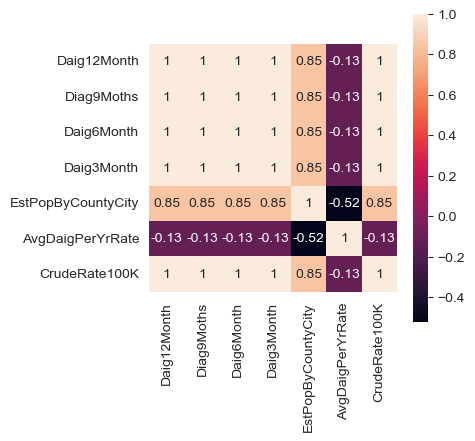

In [10]:
# View the summary by heatmap

sns.set_style('white')
plt.figure(figsize=(4,4))
x = df_CA_Diabetes.iloc[:, :0].values
y = df_CA_Diabetes.iloc[:, 1:7].values
sns.heatmap(df_CA_Diabetes.corr(), square=True, annot=True )

Create linear regression modles to predict the values/or death rate. 